# Covid-19 Analysis

In [11]:
import os
def resolve_dir(Dir):
    if not os.path.exists(Dir):
        os.makedirs(Dir)

## Preparing dataframes

In [12]:
import pandas as pd
import numpy as np

DataDir_1 = '/kaggle/input/covid-19-xray-dataset'
DataDir_2 = '/kaggle/input/chest-xray-pneumonia/chest_xray'

print(os.listdir(DataDir_1))
print(os.listdir(DataDir_2))

['covid_19_227.csv', 'covid_19_128.csv', 'covid_19_128_RGB.csv', 'covid_19.csv']
['chest_xray', '__MACOSX', 'val', 'test', 'train']


In [13]:
train_image_dir = DataDir_2 + '/train'
test_image_dir = DataDir_2 + '/test'
val_image_dir = DataDir_2 + '/val'

import cv2
from tqdm import tqdm

X_original = []
y_original = []

IMG_SIZE = 150
ColorCh = 1

CATEGORIES = ["NORMAL","PNEUMONIA"]

def getClass(num):
    if num == 1:
        return 2
    else:
        return 0
    
def getColor():
    if ColorCh == 1:
        return cv2.IMREAD_GRAYSCALE
    else:
        return cv2.IMREAD_COLOR

def prepareData(Dir,loading):
    for category in CATEGORIES:
        path = os.path.join(Dir,category)
        class_num = CATEGORIES.index(category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img = cv2.imread(os.path.join(path,img), getColor())
                
                if ColorCh == 3:
                    img = cv2.cvtColor(normal_image, cv2.COLOR_BGR2RGB)
                    
                #gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
                
                resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

                X_original.append(resized)
                y_original.append(getClass(class_num))

            except Exception as e:
                pass


prepareData(train_image_dir,'train_dataset')
prepareData(test_image_dir,'test_dataset')
prepareData(val_image_dir, 'val_dataset')

100%|██████████| 8/8 [00:00<00:00, 126.14it/s]


In [14]:
pneumonia_features = np.array(X_original).reshape(-1 , IMG_SIZE * IMG_SIZE * ColorCh)
pneumonia_label = np.array(y_original)

pneumonia_df = pd.DataFrame(pneumonia_features, dtype=np.int32)
pneumonia_df['label'] = pneumonia_label
#pneumonia_df = pneumonia_df.sample(frac = 1, random_state=73)

pneumonia_df

,0,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,label
0,4,0,41,43,41,37,54,79,56,55,...,49,42,33,37,38,42,34,36,39,0
1,102,93,95,105,131,162,110,55,59,56,...,48,32,9,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3,20,31,43,57,78,84,93,...,47,35,0,0,0,0,0,0,8,0
4,109,127,111,90,97,98,88,102,102,112,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,0,0,1,2,3,5,9,13,17,20,...,0,0,0,0,0,0,0,0,0,2
5852,0,0,0,0,0,0,0,6,7,42,...,26,66,42,198,172,70,27,12,14,2
5853,17,19,19,25,29,33,35,34,159,254,...,22,22,18,0,0,0,2,2,4,2
5854,0,0,10,22,28,30,38,50,70,81,...,14,0,1,1,1,1,2,2,2,2


In [15]:
%%time
# be patient, reading csv's may take some time ETC: < 20 sec ,low_memory=False
covid = pd.read_csv('../input/covid-19-xray-dataset/covid_19.csv', low_memory=False)

covid_features = covid.drop(["label"],axis = 1).to_numpy()
covid_labels = covid['label'].to_numpy()

covid_df = pd.DataFrame(covid_features, dtype=np.int32)
covid_df['label'] = covid_labels

covid_df

CPU times: user 12.4 s, sys: 1.3 s, total: 13.7 s
Wall time: 13.7 s


,0,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,label
0,6,12,30,39,50,61,69,72,74,77,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,7,35,59,72,83,99,...,0,0,0,0,0,0,0,0,0,0
2,16,31,41,57,60,68,71,83,88,86,...,0,0,0,0,0,0,0,0,0,0
3,0,0,6,17,33,40,50,60,63,76,...,0,0,0,0,0,0,0,0,0,0
4,39,38,38,39,38,38,38,39,39,38,...,125,126,127,129,129,129,132,131,135,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2486,230,220,218,221,221,222,226,224,227,221,...,40,26,0,0,0,0,0,0,0,0
2487,138,98,74,57,48,42,38,35,34,36,...,65,64,63,62,66,78,90,103,127,1
2488,51,60,60,65,71,72,64,66,70,61,...,0,0,0,0,0,0,0,0,0,0
2489,115,124,125,122,122,124,126,127,126,119,...,45,10,11,10,9,10,10,10,11,0


## Combining (pneumonia & covid_19) datasets

In [16]:
virus_df = pd.concat([pneumonia_df,covid_df ], ignore_index=False)
virus_df = virus_df.sample(frac = 1, random_state=73)
virus_df

,0,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,label
3141,70,71,71,67,64,63,61,65,63,64,...,5,12,14,16,18,18,19,19,20,2
3221,27,32,40,43,46,48,59,114,113,115,...,103,146,100,113,36,20,9,5,0,2
171,95,83,75,70,76,75,74,74,75,73,...,128,114,167,142,129,70,51,16,1,0
3076,0,0,0,0,0,0,0,0,5,37,...,9,0,0,0,0,0,0,0,0,2
2479,0,0,0,0,0,0,1,8,18,20,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,103,111,109,112,115,112,101,101,85,73,...,0,0,0,0,0,0,0,0,0,2
4419,14,16,24,23,22,19,17,21,14,13,...,20,21,21,22,21,23,24,24,24,2
4014,0,0,56,67,64,81,61,70,75,77,...,9,8,9,10,11,12,13,0,0,2
2482,14,13,13,12,11,10,10,10,10,8,...,4,0,0,0,0,0,0,0,0,1


In [17]:
#virus_df.to_csv('virus_df.csv', header=False, index=False)
#from IPython.display import FileLink
#FileLink(r'./virus_df.csv')

## Data Summary

In [18]:
print('> DataFrame shape: ',virus_df.shape)
print('> {} images '.format(virus_df.shape[0]))
print('> {} --> {} * {} pixels for each image ({}d scaled)'.format(virus_df.shape[1],IMG_SIZE,IMG_SIZE, ColorCh))

> DataFrame shape:  (8347, 22501)
> 8347 images 
> 22501 --> 150 * 150 pixels for each image (1d scaled)


In [19]:
label_count = pd.Series(virus_df['label'].values.ravel()).value_counts()

print('> Class 0 - Normal:\t',label_count[0])
print('> Class 1 - Covid: \t',label_count[1])
print('> Class 2 - Pneumonia: \t',label_count[2])

> Class 0 - Normal:	 3166
> Class 1 - Covid: 	 908
> Class 2 - Pneumonia: 	 4273


In [20]:
print('> Class 0 - Normal:\t',label_count[0])
print('> Class 1 - Covid: \t',label_count[1])
print('> Class 2 - Pneumonia: \t',label_count[2])

> Class 0 - Normal:	 3166
> Class 1 - Covid: 	 908
> Class 2 - Pneumonia: 	 4273


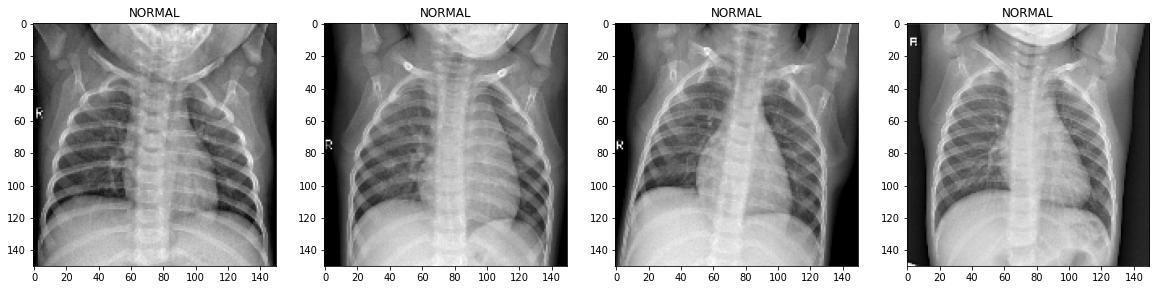

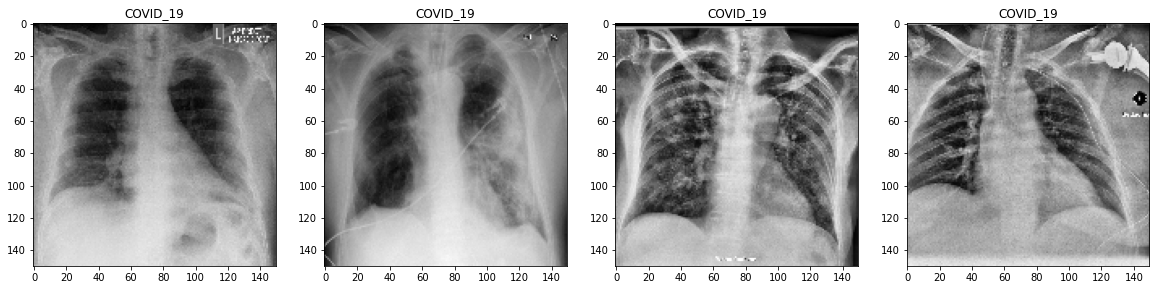

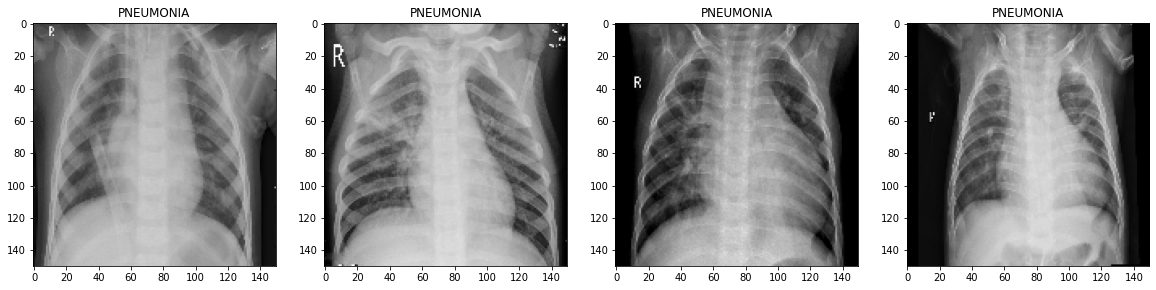

In [21]:
import matplotlib.pyplot as plt

def getClassName(item):
    if item == 1:
        return 'COVID_19'
    if item == 0:
        return 'NORMAL'
    if item == 2:
        return 'PNEUMONIA'

def print_images(samples): 
    images = np.array(samples.drop(["label"],axis = 1), dtype='int32')
    labels = samples['label'].to_numpy()    
    fig=plt.figure(figsize=(20, 8))
    columns = 4
    rows = 1
    
    for i, image in enumerate(images):
        fig.add_subplot(rows,columns,i + 1)
        title = '{}'.format(getClassName(labels[i]))
        
        if ColorCh == 3:            
            Sample_image = image.reshape(IMG_SIZE, IMG_SIZE, ColorCh)
        
        if ColorCh == 1:
            Sample_image = image.reshape(IMG_SIZE, IMG_SIZE)
            
        plt.imshow(Sample_image, cmap='gray')
        plt.title(title)
        
    plt.show()
        

normal_samples = (virus_df[virus_df['label']==0].iloc[0:4])
print_images(normal_samples)

covid_samples = (virus_df[virus_df['label']==1].iloc[0:4])
print_images(covid_samples)

pneumonia__samples = (virus_df[virus_df['label']==2].iloc[0:4])
print_images(pneumonia__samples)

%matplotlib inline

## Data Preprocessing

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

features = virus_df.drop(["label"],axis = 1).to_numpy()
labels = virus_df['label'].to_numpy()

stratified_sample = StratifiedShuffleSplit(n_splits=3, test_size=0.17, random_state=73)

In [23]:
for train_index, test_index in stratified_sample.split(features, labels):
    X_train, test_X = features[train_index], features[test_index]
    y_train, test_y = labels[train_index], labels[test_index]
    
half_size = np.int(len(test_X) / 2)
X_val, y_val = test_X[0:half_size], test_y[0:half_size]
X_test, y_test = test_X[half_size:], test_y[half_size:]

In [24]:
# data summary
print('> {} train size'.format(X_train.shape[0]))
print('> {} test size'.format(X_test.shape[0]))
print('> {} val size'.format(X_val.shape[0]))

> 6928 train size
> 710 test size
> 709 val size


In [25]:
# normalize
X_train_nn = X_train.reshape(-1,IMG_SIZE,IMG_SIZE,ColorCh) / 255
X_test_nn = X_test.reshape(-1,IMG_SIZE,IMG_SIZE,ColorCh) / 255
X_val_nn = X_val.reshape(-1,IMG_SIZE,IMG_SIZE,ColorCh) / 255
input_shape = X_train_nn.shape[1:]

print(input_shape)

(150, 150, 1)


## Multiclass classification with CNN

In [26]:
# TPU init
TPU_INIT = True
import tensorflow as tf

if TPU_INIT:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [27]:
from tensorflow.keras.layers import Activation, Input ,Conv2D, MaxPooling2D, MaxPool2D, Dropout, Dense, Activation, Flatten, SeparableConv2D, DepthwiseConv2D, AveragePooling2D, GlobalAveragePooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

kernel_regularizer = regularizers.l2(0.0001)
#kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)
bias_regularizer=regularizers.l2(1e-4)
activity_regularizer=regularizers.l2(1e-5)

final_activation = 'softmax'
entropy = 'sparse_categorical_crossentropy'

n_classes = len(label_count)
print('N_classes: ', n_classes)

N_classes:  3


In [28]:
def CustomNet():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.Input(shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
    
    model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
    
    model.add(Conv2D(filters=128, kernel_size=(5,5), padding='same', activation='relu'))        
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

    model.add(Conv2D(filters=256, kernel_size=(5,5), padding='same', activation='relu'))        
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
    
    model.add(Flatten())
    
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.7))
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.7))
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.7))
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.7))
    
    model.add(Dense(3,activation='softmax'))
    return model

from tensorflow.keras.applications import MobileNet, MobileNetV2

def MobileNet_Model():
    baseModel = MobileNet(
                          weights=None,
                          include_top=False, input_tensor=Input(shape=input_shape))    
    baseModel.trainable = True
    headModel = baseModel.output

    headModel = AveragePooling2D(pool_size=(4))(headModel)
    headModel = Flatten()(headModel)
    
    #headModel = GlobalAveragePooling2D()(headModel)
    
    headModel = Dense(512, activation="relu")(headModel)
    headModel = Dropout(0.7)(headModel)
    headModel = Dense(512, activation="relu")(headModel)
    headModel = Dropout(0.7)(headModel)  
    headModel = Dense(512, activation="relu")(headModel)
    headModel = Dropout(0.7)(headModel)  
    headModel = Dense(512, activation="relu")(headModel)
    headModel = Dropout(0.7)(headModel)
    
    headModel = Dense(n_classes, activation=final_activation)(headModel)
    model = Model(inputs = baseModel.input, outputs = headModel)
    
    return model
    
    
    
def AlexNet_Model():
    AlexNet = Sequential()
  
    AlexNet.add(Conv2D(filters=96, kernel_size=11, strides=4, activation='relu', input_shape = input_shape))
    AlexNet.add(MaxPool2D(pool_size=3, strides=2))

    AlexNet.add(Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'))
    AlexNet.add(MaxPool2D(pool_size=3, strides=2))

    AlexNet.add(Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))
    AlexNet.add(Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'))
    AlexNet.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
    AlexNet.add(MaxPool2D(pool_size=3, strides=2))
    
    AlexNet.add(Flatten())

    #AlexNet.add(GlobalAveragePooling2D())
    
    AlexNet.add(Dense(512, activation="relu"))
    AlexNet.add(Dropout(0.8))
    AlexNet.add(Dense(512, activation="relu"))
    AlexNet.add(Dropout(0.8))
    AlexNet.add(Dense(512, activation="relu"))
    AlexNet.add(Dropout(0.8))
    AlexNet.add(Dense(512, activation="relu"))
    AlexNet.add(Dropout(0.8))
    
    AlexNet.add(Dense(3, activation=final_activation))

    return AlexNet

    
def VGG_Model():
    vgg_model = Sequential()

    vgg_model.add(Conv2D(input_shape=(input_shape),filters=64,kernel_size=(3,3), padding="same", activation="relu"))
    vgg_model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    vgg_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    vgg_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    vgg_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    vgg_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
    vgg_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    vgg_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    vgg_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    vgg_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    vgg_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
    vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    vgg_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
    vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    vgg_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    vgg_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    vgg_model.add(Flatten())
    
    vgg_model.add(Dense(units=4096,activation="relu"))
    vgg_model.add(Dropout(0.8))
    vgg_model.add(Dense(units=4096,activation="relu"))
    vgg_model.add(Dropout(0.8))
    
    vgg_model.add(Dense(units=n_classes, activation=final_activation))

    model = vgg_model
    return model

In [29]:
EPOCHS = 500
patience = 25

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 16

#Stochastic Gradient Descent
if TPU_INIT:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8


def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr

class end_callback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if ((logs.get('accuracy')>=0.999)):
            print("\nLimits Reached cancelling training!")
            self.model.stop_training = True

In [30]:
def load_model():
    #model = CustomNet()
    #model = AlexNet_Model()
    model = VGG_Model()
    #model = MobileNet_Model()
    
    model.compile(Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), loss=entropy,metrics=['accuracy'])
    return model
    
if TPU_INIT:    
    with tpu_strategy.scope():
        model = load_model()
else:
    model = load_model()

print(model.summary())


checkpoint_filepath = 'Model_Weights.h5'
!rm -rf {checkpoint_filepath}
early_stopping = EarlyStopping(patience = patience, monitor='val_loss', mode='min', restore_best_weights=True)

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        save_best_only=True)

lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=False)

my_callbacks = [
    early_stopping,
    model_checkpoints,
    lr_callback,
    end_callback()
]

history = model.fit(X_train_nn ,y_train, epochs=EPOCHS,
                        callbacks=my_callbacks,
                        validation_data = (X_val_nn, y_val),
                        batch_size=batch_size)

model.load_weights(checkpoint_filepath)

from IPython.display import clear_output
clear_output()

print(model.summary())
print('Total Epochs :', len(history.history['loss']))
print('Accuracy on train:',history.history['accuracy'][-1],'\tLoss on train:',history.history['loss'][-1])
print('Accuracy on val :',history.history['val_accuracy'][-1],'\tLoss on val:',history.history['val_loss'][-1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 256)       2

## Restoring Best Weights

Best Epochs:  9
Accuracy on train: 0.9509238004684448 	Loss on train: 0.13696014881134033
Accuracy on test: 0.9535210728645325 	Loss on test: 0.13835102319717407
Accuracy on val: 0.9435824751853943 	Loss on val: 0.1460673063993454


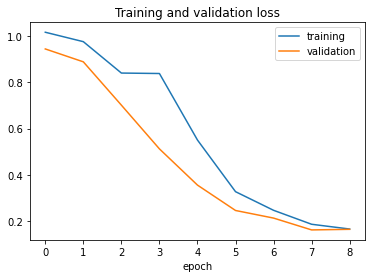

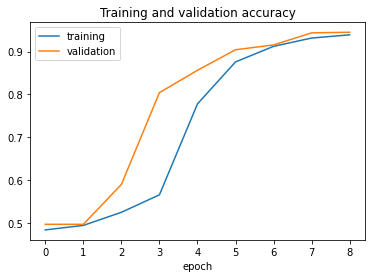

In [31]:
# CNN training results
val_loss, val_accuracy = model.evaluate(X_val_nn, y_val, verbose=0)

def get_best_epoch():
    for key, item in enumerate(history.history.items()):
        (name, arr) = item
        if name == 'val_loss':
            for i in range(len(arr)):
                if round(val_loss, 2) == round(arr[i], 2):
                    return i
        

index = get_best_epoch()
print('Best Epochs: ', index)

train_accuracy = history.history['accuracy'][index]
train_loss = history.history['loss'][index]

test_loss, test_accuracy = model.evaluate(X_test_nn, y_test, verbose=0)

print('Accuracy on train:',train_accuracy,'\tLoss on train:',train_loss)
print('Accuracy on test:',test_accuracy,'\tLoss on test:',test_loss)
print('Accuracy on val:',val_accuracy,'\tLoss on val:',val_loss)


def print_graph(item):
    train_values = history.history[item][0:index]
    plt.plot(train_values)
    test_values = history.history['val_' + item][0:index]
    plt.plot(test_values)
    plt.legend(['training','validation'])
    plt.title('Training and validation '+ item)
    plt.xlabel('epoch')
    plt.show()

print_graph('loss')
print_graph('accuracy')

In [32]:
def _n_Rows_to_render(n_wrongs):
    if(n_wrongs <= 5):
        return 1
    if(n_wrongs <= 10):
        return 2
    if(n_wrongs <= 15):
        return 3
    if(n_wrongs <= 20):
        return 4
    if(n_wrongs <= 25):
        return 5
    
from sklearn import metrics

def test_set_results(name,pred_value):
    corr_pred = metrics.confusion_matrix(y_test,pred_value)
    n_correct = np.int((corr_pred[0][0] + corr_pred[1][1] + corr_pred[2][2]))
    print('...'*15)
    print('> ',name,'Correct Predictions:',n_correct)
    n_wrongs = np.int((corr_pred[0][1] + corr_pred[0][2]) + (corr_pred[1][0] + corr_pred[1][2]) + (corr_pred[2][0]  + corr_pred[2][1]))
    print('> ',name,'Wrong Predictions:',n_wrongs)
    print('...'*15)
    #print(corr_pred)
    print('Confusion Matrix')
    import seaborn as sns
    sns.heatmap(corr_pred,annot=True, fmt="d",cmap="Blues")
    plt.show() 
    
    columns = 5
    rows = _n_Rows_to_render(n_wrongs)
    wrong_pred_fig=plt.figure(figsize=(20, 10))
    
    print('Wrongly Predicted images')
    i = 0
    for row_index, (input, prediction, label) in enumerate(zip (X_test, pred_value, y_test)):
        if prediction != label:
            title = ("id:{}, Predicted: {}, Correct: {}").format(row_index,prediction,label)
            if n_wrongs <= 25:
                wrong_pred_fig.add_subplot(rows,columns,i + 1)
                image = X_test[row_index].reshape(IMG_SIZE, IMG_SIZE, ColorCh)
                plt.imshow(image,cmap='gray',aspect=1)
                plt.axis('off')
                plt.title(title)
                i = i + 1
            
    plt.show()

## Model evaluation

Model Evaluation on the test_set
.............................................
>  CNN Correct Predictions: 677
>  CNN Wrong Predictions: 33
.............................................
Confusion Matrix


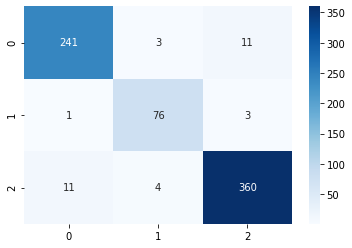

Wrongly Predicted images


<Figure size 1440x720 with 0 Axes>

In [33]:
print('Model Evaluation on the test_set')

cnn_test_model = model.predict(X_test_nn)
cnn_prob = []

def getClass(val):
    normal = val[0]
    covid = val[1]
    pneumonia = val[2]
    
    if((normal > covid) & (normal > pneumonia)):
        return 0
    
    if((pneumonia > normal) & (pneumonia > covid)):
        return 2
    
    if((covid > normal) & (covid > pneumonia)):
        return 1

    
for i in range(len(X_test)):
    pred = getClass(cnn_test_model[i])
    cnn_prob.append(pred)

test_set_results('CNN',cnn_prob)

### Single image test

CNN Prediction: COVID_19 (+ve)
Correct Answer: COVID_19 (+ve)


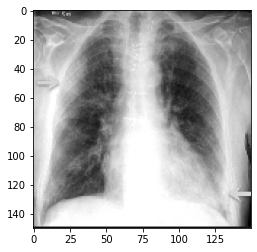

In [34]:
image_id = 66

def print_results(val):
  if val == 0:
    return 'Normal (-ve)'
  if val == 1:
    return 'COVID_19 (+ve)'
  if val == 2:
    return 'Baterial (+ve)'

sample_cnn_pred = model.predict(X_test_nn[image_id].reshape(1,IMG_SIZE,IMG_SIZE,1))
probability = getClass(sample_cnn_pred[0])

print('CNN Prediction:',print_results(probability))
print('Correct Answer:',print_results(y_test[image_id]))

plt.imshow(X_test[image_id].reshape(IMG_SIZE,IMG_SIZE),cmap='gray')
plt.show()

## Saving Model

In [35]:
from IPython.display import FileLink

In [36]:
# tensorflow model
os.system('rm -f /kaggle/working/covid_cnn_model.h5')
model.save('covid_cnn_model.h5')
FileLink(r'./covid_cnn_model.h5')

/kaggle/working/covid_cnn_model.h5

In [37]:
# Saving tensorflow js model
os.system('rm -f /kaggle/working/tfjsmodel.zip && rm -f /kaggle/working/my_tfjs/*')
os.system('pip install tensorflowjs')
os.system('tensorflowjs_converter --input_format=keras covid_cnn_model.h5 my_tfjs')
import shutil
shutil.make_archive('tfjsmodel', 'zip', 'my_tfjs')
FileLink(r'./tfjsmodel.zip')

/kaggle/working/tfjsmodel.zip

In [38]:
# Saving TF-lite-model
#tf_lite_model = tf.lite.TFLiteConverter.from_keras_model(model).convert()
#open("covid_model_lite.tflite", "wb").write(tf_lite_model)
#FileLink(r'./covid_model_lite.tflite')

In [39]:
print('Saved Models :', os.listdir('/kaggle/working/'))

Saved Models : ['my_tfjs', 'tfjsmodel.zip', 'Model_Weights.h5', '__notebook_source__.ipynb', 'covid_cnn_model.h5']


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import time
import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import cv2
import shutil
from pandas import DataFrame
from sklearn.metrics import confusion_matrix, classification_report
pd.set_option('display.width', 150)

In [2]:
covid_dir='../input/covid19-radiography-dataset/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID'
lung_opacity_dir='../input/covid19-radiography-dataset/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Lung_Opacity'
normal_dir='../input/covid19-radiography-dataset/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Normal'
pneumonia_dir='../input/covid19-radiography-dataset/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Viral Pneumonia'
dirlist=[covid_dir, lung_opacity_dir, normal_dir, pneumonia_dir]
classes=['covid', 'lung_opacity', 'normal', 'pneumonia']
filepaths=[]
labels=[]
for d,c in zip(dirlist, classes):
    flist=os.listdir(d)
    for f in flist:
        fpath=os.path.join (d,f)
        filepaths.append(fpath)
        labels.append(c)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  21165    labels:  21165


In [3]:
Fseries=pd.Series(filepaths, name='file_paths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries,Lseries], axis=1)
df=DataFrame(np.array(df).reshape(21165,2), columns = ['file_paths', 'labels'])
print(df['labels'].value_counts())

normal          10192
lung_opacity     6012
covid            3616
pneumonia        1345
Name: labels, dtype: int64


In [4]:
df.head()

,file_paths,labels
0,../input/covid19-radiography-dataset/COVID-19_...,covid
1,../input/covid19-radiography-dataset/COVID-19_...,covid
2,../input/covid19-radiography-dataset/COVID-19_...,covid
3,../input/covid19-radiography-dataset/COVID-19_...,covid
4,../input/covid19-radiography-dataset/COVID-19_...,covid


**Dataset is Inbalanced. We want to detect Covid so we add images for pneumonia from another dataset and remove images from lung opacity and normal**

In [5]:
normal_count = 10192
lung_opacity_count = 6012
covid_count = 3616
normal_image_max_index = (df.labels.values == 'normal').argmax()
print(normal_image_max_index)
lung_opacity_max_index = (df.labels.values == 'lung_opacity').argmax()
print(lung_opacity_max_index)

9628
3616


In [6]:
for i in range(normal_count - covid_count):
    df = df.drop([normal_image_max_index + i])
    
for n in range(lung_opacity_count - covid_count):
    df = df.drop([lung_opacity_max_index + n])

df['labels'].value_counts()

lung_opacity    3616
covid           3616
normal          3616
pneumonia       1345
Name: labels, dtype: int64

In [7]:
filepaths=[]
labels=[]
for file in glob.glob('../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/*.jpeg'):
    filepaths.append(file)
    labels.append('pneumonia')
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  3875    labels:  3875


In [8]:
fseries = pd.Series(filepaths, name='file_name', dtype='str')
lseries = pd.Series(labels, name='label', dtype='str')
extra_df = pd.concat([fseries, lseries], axis=1)
extra_df = DataFrame(np.array(extra_df).reshape(3875,2), columns = ['file_paths', 'labels'])
extra_df.head()

,file_paths,labels
0,../input/chest-xray-pneumonia/chest_xray/train...,pneumonia
1,../input/chest-xray-pneumonia/chest_xray/train...,pneumonia
2,../input/chest-xray-pneumonia/chest_xray/train...,pneumonia
3,../input/chest-xray-pneumonia/chest_xray/train...,pneumonia
4,../input/chest-xray-pneumonia/chest_xray/train...,pneumonia


In [9]:
df=pd.concat([df,extra_df], axis=0)
df=df.reset_index()

In [10]:
df['labels'].value_counts()
df.head()

,index,file_paths,labels
0,0,../input/covid19-radiography-dataset/COVID-19_...,covid
1,1,../input/covid19-radiography-dataset/COVID-19_...,covid
2,2,../input/covid19-radiography-dataset/COVID-19_...,covid
3,3,../input/covid19-radiography-dataset/COVID-19_...,covid
4,4,../input/covid19-radiography-dataset/COVID-19_...,covid


In [11]:
pneumonia_count=5220
pneumonia_max_index=(df.labels.values == 'pneumonia').argmax()
print(pneumonia_max_index)
for i in range(pneumonia_count - covid_count):
    df = df.drop([pneumonia_max_index + i])

10848


In [12]:
print(df['labels'].value_counts())
df.head()

pneumonia       3616
lung_opacity    3616
covid           3616
normal          3616
Name: labels, dtype: int64


,index,file_paths,labels
0,0,../input/covid19-radiography-dataset/COVID-19_...,covid
1,1,../input/covid19-radiography-dataset/COVID-19_...,covid
2,2,../input/covid19-radiography-dataset/COVID-19_...,covid
3,3,../input/covid19-radiography-dataset/COVID-19_...,covid
4,4,../input/covid19-radiography-dataset/COVID-19_...,covid


In [13]:
target_size=(299,299)
batch_size=64

In [14]:
train_datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.2, preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input, validation_split=0.1)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input)
train_df, test_df = train_test_split(df, train_size=0.95, shuffle=True)
train_set = train_datagen.flow_from_dataframe(train_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', shuffle=True, class_mode='categorical', subset='training')
valid_set = train_datagen.flow_from_dataframe(train_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', shuffle=True, class_mode='categorical', subset='validation')
test_set = test_datagen.flow_from_dataframe(test_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', shuffle=True, class_mode='categorical')
test_x, test_y = next(test_set)

Found 12366 validated image filenames belonging to 4 classes.
Found 1374 validated image filenames belonging to 4 classes.
Found 724 validated image filenames belonging to 4 classes.


In [15]:
base_model = tf.keras.applications.InceptionResNetV2(include_top=False, input_shape=(299,299,3))

219062272/219055592 [==============================] - 2s 0us/step


In [16]:
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [17]:
model = tf.keras.Sequential([
    base_model, tf.keras.layers.GlobalAveragePooling2D(), tf.keras.layers.Dense(256, activation='relu'), tf.keras.layers.BatchNormalization(), tf.keras.layers.Dropout(0.2), tf.keras.layers.Dense(4, activation='softmax')
])
lr=0.001
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=lr), metrics=['accuracy'])

In [18]:
patience = 1
stop_patience = 5
factor = 0.5

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1)
]

In [19]:
epochs = 20
history = model.fit(train_set, validation_data=valid_set, epochs=epochs, callbacks=callbacks, verbose=1)

Epoch 1/20
194/194 [==============================] - 438s 2s/step - loss: 0.5075 - accuracy: 0.8274 - val_loss: 0.3979 - val_accuracy: 0.8646
Epoch 2/20
194/194 [==============================] - 357s 2s/step - loss: 0.1875 - accuracy: 0.9341 - val_loss: 0.2838 - val_accuracy: 0.8937
Epoch 3/20
194/194 [==============================] - 358s 2s/step - loss: 0.1457 - accuracy: 0.9459 - val_loss: 0.2339 - val_accuracy: 0.9185
Epoch 4/20
194/194 [==============================] - 358s 2s/step - loss: 0.1221 - accuracy: 0.9562 - val_loss: 0.2485 - val_accuracy: 0.9098

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/20
194/194 [==============================] - 357s 2s/step - loss: 0.0864 - accuracy: 0.9696 - val_loss: 1.9641 - val_accuracy: 0.8959

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 6/20
194/194 [==============================] - 359s 2s/step - loss: 0.0722 - accuracy: 0.9731 - val_loss: 0.1237 - v

In [20]:
model.evaluate(test_set)

12/12 [==============================] - 9s 762ms/step - loss: 0.1455 - accuracy: 0.9641


[0.14546768367290497, 0.9640883803367615]

In [2]:
!pip install vit_keras -q 

## Setup

In [3]:
import os
import cv2
import sys
import random
import warnings
import numpy as np 
import pandas as pd
from time import time
from itertools import chain
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt 
from skimage.transform import resize
from skimage.morphology import label
from skimage.io import imread, imshow, imread_collection, concatenate_images

import tensorflow as tf
from vit_keras import  vit, utils 
from tensorflow.keras import backend as K
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import (
    Dense, Input, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, Concatenate, 
    Activation, Add, multiply, add, concatenate, LeakyReLU, ZeroPadding2D, UpSampling2D, 
    BatchNormalization, SeparableConv2D, Flatten )

from sklearn.metrics import classification_report
%matplotlib inline

In [4]:
MAIN_PATH = '../input/chest-xray-pneumonia/chest_xray/'

## Data Augmentation

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.25,
                             zoom_range=0.1,
                             rotation_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

def get_transforms(data):
    
    if data == 'train':
        IMG_TRAIN = MAIN_PATH +'train/'
        train_generator = datagen.flow_from_directory(
            # dataframe = train,
            directory = IMG_TRAIN,
            # x_col = 'filename',
            # y_col = 'label',
            batch_size  = 8,
            shuffle=True,
            class_mode = 'categorical',
            target_size = (224, 224)
        )

        return train_generator

    elif data == 'valid':
        IMG_VAL = MAIN_PATH + 'val/'
        valid_generator = datagen.flow_from_directory(
            # dataframe = valid,
            directory = IMG_VAL,
            # x_col = 'filename',
            # y_col = 'label',
            batch_size = 8,
            shuffle = True,
            class_mode = 'categorical',
            target_size = (224, 224)
        )

        return valid_generator

    else :
        IMG_TEST = MAIN_PATH + 'test/'
        test_generator = test_datagen.flow_from_directory(
            # dataframe = test,
            directory = IMG_TEST,
            # x_col = 'filename',
            # y_col = None,
            batch_size = 8,
            shuffle = False,
            class_mode = None,
            target_size = (224, 224)
        )

        return test_generator

In [6]:
train = get_transforms('train')
valid = get_transforms('valid')
test = get_transforms('test')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Callbacks

In [7]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

reduce_learning_rate = ReduceLROnPlateau(
    monitor='val_loss', factor=0.25, patience=5, verbose=1, mode='auto',
    min_delta=1e-10, cooldown=0, min_lr=0
)

early_stopping = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=9, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

ckpt = ModelCheckpoint(
    filepath = './saved_model/checkpoint/',
    save_weights_only = True,
    monitor = 'val_loss',
    mode = 'min',
    save_best_only = True
)

callbacks = [reduce_learning_rate, early_stopping, ckpt]

## Model

In [8]:
image_size = 224
model = vit.vit_b16(
    image_size = image_size,
    activation = 'softmax',
    pretrained = True,
    include_top = True,
    pretrained_top = False,
    classes = 2
)

347504640/347502902 [==============================] - 5s 0us/step


/opt/conda/lib/python3.7/site-packages/vit_keras/utils.py:79: UserWarning: Resizing position embeddings from 24 to 14
  UserWarning,


In [9]:
model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), loss='binary_crossentropy', metrics=['accuracy'])

## Train

In [10]:
history = model.fit(train, epochs=50, validation_data=valid, callbacks=callbacks, verbose=1)

Epoch 1/50
652/652 [==============================] - 211s 296ms/step - loss: 0.2543 - accuracy: 0.8995 - val_loss: 0.3529 - val_accuracy: 0.8125
Epoch 2/50
652/652 [==============================] - 164s 251ms/step - loss: 0.1157 - accuracy: 0.9531 - val_loss: 0.2893 - val_accuracy: 0.9375
Epoch 3/50
652/652 [==============================] - 164s 251ms/step - loss: 0.0977 - accuracy: 0.9603 - val_loss: 0.9961 - val_accuracy: 0.6875
Epoch 4/50
652/652 [==============================] - 165s 252ms/step - loss: 0.0735 - accuracy: 0.9744 - val_loss: 0.9145 - val_accuracy: 0.7500
Epoch 5/50
652/652 [==============================] - 165s 253ms/step - loss: 0.0915 - accuracy: 0.9659 - val_loss: 0.7137 - val_accuracy: 0.8125
Epoch 6/50
652/652 [==============================] - 166s 254ms/step - loss: 0.0677 - accuracy: 0.9772 - val_loss: 0.1048 - val_accuracy: 1.0000
Epoch 7/50
652/652 [==============================] - 166s 254ms/step - loss: 0.0626 - accuracy: 0.9774 - val_loss: 0.9125 -

In [11]:
model.evaluate(valid, verbose=1)

2/2 [==============================] - 0s 180ms/step - loss: 0.2808 - accuracy: 0.9375


[0.2808055877685547, 0.9375]

In [21]:
y_pred = model.predict(test, verbose=1)
y_pred = np.argmax(y_pred, axis = 1)

78/78 [==============================] - 9s 107ms/step


In [22]:
def create_df (dataset, label):
    filenames = []  
    labels = []
    for file in os.listdir(MAIN_PATH + f'{dataset}/{label}'):
        filenames.append(file)
        labels.append(label)
    return pd.DataFrame({'filename':filenames, 'label':labels})

test_NORMAL = create_df('test', 'NORMAL')
test_PNEUMONIA = create_df('test', 'PNEUMONIA')
test_ori = test_NORMAL.append(test_PNEUMONIA, ignore_index=True)
test_ori['label'] = test_ori['label'].apply(lambda x: 0 if x=='NORMAL' else 1)
y_true = test_ori['label'].values

In [23]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       234
           1       0.90      0.99      0.94       390

    accuracy                           0.92       624
   macro avg       0.94      0.90      0.92       624
weighted avg       0.93      0.92      0.92       624



In [4]:
import json
import os

# note -- we can look at a .ipynb file as a plain text file right here in Jupyter notebook
with open ('96-val-acc-covid-19-radiography.ipynb', mode = 'r', encoding = 'utf-8') as f:
    a = json.load (f)

print(type(a))

print(a.keys())

#print(a)

<class 'dict'>
dict_keys(['cells', 'metadata', 'nbformat', 'nbformat_minor'])


In [5]:
# generate list of files to be merged
notebooks_to_merge = [file for file in os.listdir(os.getcwd()) if file.endswith('.ipynb')]

# list should be in the order in which you want the notebooks to be merged
# my notebooks are labeled 1.ipynb, 2.ipynb... in the order I want
notebooks_to_merge.sort()

print(notebooks_to_merge)

['96-val-acc-covid-19-radiography.ipynb', 'merging notebooks.ipynb', 'project.ipynb', 'tensorflow-vit-chest-x-ray-images-pneumonia.ipynb']


In [6]:
def combine_ipynb_files(list_of_notebooks, combined_file_name):
    
    '''
    parameters:
    `list_of_notebooks` is an ordered list of your .ipynb files to be merged
    `combined_file_name` is the name of your combined .ipynb file which will be generated by this function
    
    returns: the filepath of the new file
    '''
    
    with open (notebooks_to_merge[0], mode = 'r', encoding = 'utf-8') as f:
        a = json.load (f)
    
    for notebook in notebooks_to_merge[1:]:
        with open (notebook, mode = 'r', encoding = 'utf-8') as f:
            b = json.load(f)
            a['cells'].extend (b['cells']) 
                # extend here, not append, so that each dictionary in b['cells']
                # is added to new dictionary in a['cells']

    with open(combined_file_name, mode='w', encoding='utf-8') as f:
        json.dump(a, f)
    
    print('Generated file: "{}".'.format(combined_file_name))
    
    return (os.path.realpath(combined_file_name))

combine_ipynb_files(notebooks_to_merge, "Data science tools project.ipynb")

Generated file: "Data science tools project.ipynb".


'C:\\Users\\hp\\Data science tools project.ipynb'